In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # Suppress warnings

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [6]:
X = df.drop(['Id','Species'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y = df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [8]:
x = df.copy()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(X)

In [10]:
df_scaled[:5,:]     # (rows:columns)

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# Apply PCA on Scaled Data


* It is very important to use standard scaler to scale data before applying PCA.

* Not use any other scaler.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

In [12]:
?PCA

In [13]:
pca.fit(df_scaled)

PCA(random_state=42)

In [14]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [15]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

# Visualizing Principal Components


* We Visualize Principal Components because to find the number of principal components which contains maximum variance.


* We also visualize that what principal component contain what amount of variance.


* Principal Component = newly created features/columns by PCA

## Bar plot :- To visualize what PC contain what amount of variance

<BarContainer object of 4 artists>

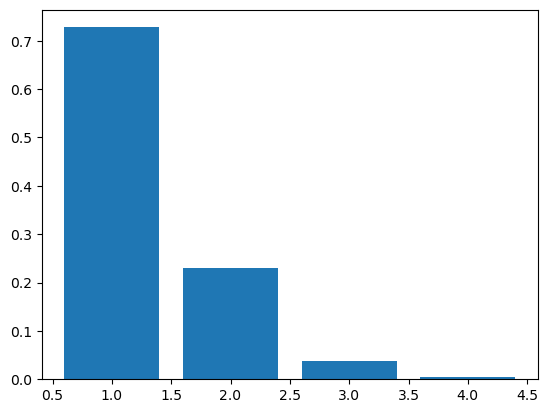

In [16]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

### As we see PC1 contains almost 70% of variance and PC2 contains almost 20% of variance.

## Scree Plot :-  A scree plot shows how much variation each PC captures from the data. The y axis is eigenvalues, which essentially stand for the amount of variation. Use a scree plot to select the principal components to keep.


* y axis- Eigenvalues/Variability value explained/information


* x axis- columns/vectors/ eigenvectors


* A scree plot is a graph that is commonly used in principal component analysis (PCA) to help identify the number of principal components that should be retained in the analysis.


* In PCA, the goal is to reduce the dimensionality of a dataset by finding a smaller number of variables (i.e., principal components) that explain most of the variation in the original data. The scree plot is a graphical representation of the amount of variance explained by each principal component. It plots the eigenvalues of each principal component against the component number, in descending order.

In [17]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

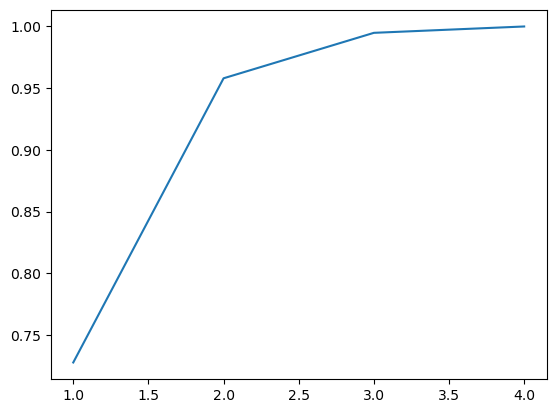

In [18]:
plt.plot(range(1,len(var_cumu)+1),var_cumu)

# OR

Text(0, 0.5, 'Cumulative Variance')

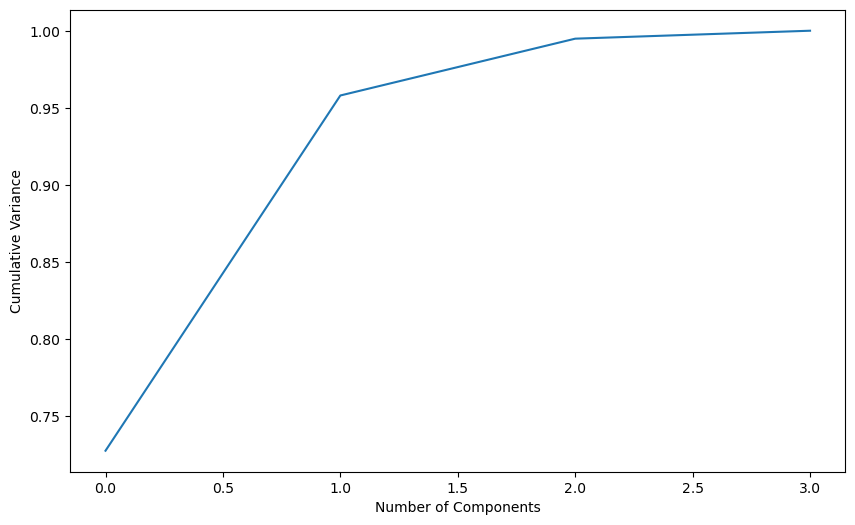

In [27]:
fig = plt.figure(figsize = (10,6))
plt.plot(var_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

### As we see our 2 PC contains almost 95-96% Variance so we select no. of  PC=2

In [19]:
pc2 = PCA(n_components=2, random_state=42) # It will give only 2 PC and drop all remaining PC

In [20]:
new_df = pc2.fit_transform(df_scaled)

In [21]:
new_df.shape

(150, 2)

## We can select a threshold for proportion of variance. So, PCA gives only those PC which carrying given amount of variance and remove remaing PC's.

In [32]:
pc3 =PCA (0.90)

In [33]:
new_df1 = pc3.fit_transform(df_scaled)

In [34]:
new_df1.shape

(150, 2)

### It gives 2 PC because 2 PC conatins 90% of variance.

### Making a Data Frame of PC

In [22]:
data = pd.DataFrame(new_df, columns = ['PC1','PC2'])
data.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [23]:
pc2.explained_variance_ratio_

array([0.72770452, 0.23030523])

### Concat this PCs with target variable

In [24]:
df_final = pd.concat([data,y],axis=1)
df_final.head()

,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## Visualize the clusters of dataset on the basis of target categories after applying PCA

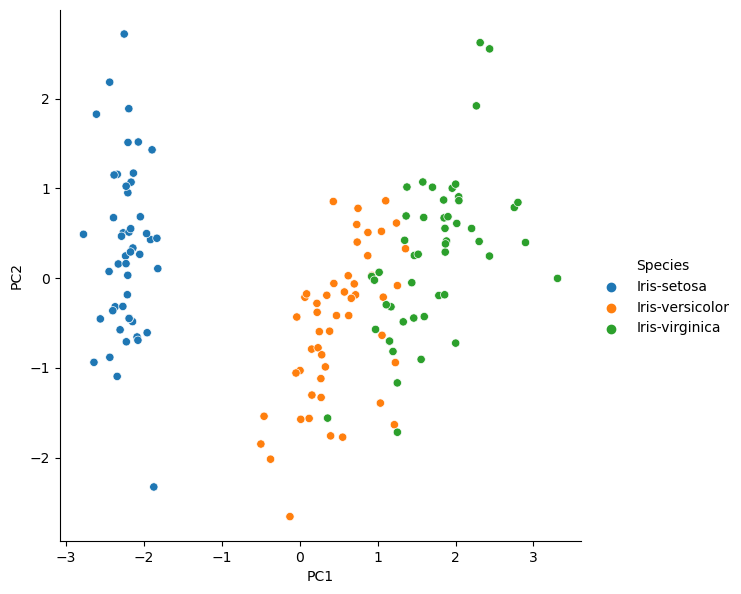

In [25]:
sns.pairplot(data = df_final, x_vars = ['PC1'], y_vars = ['PC2'], hue = 'Species', size = 6)

In [40]:
df_final.corr()

,PC1,PC2
PC1,1.000000e+00,-1.517135e-16
PC2,-1.517135e-16,1.000000e+00


<AxesSubplot:>

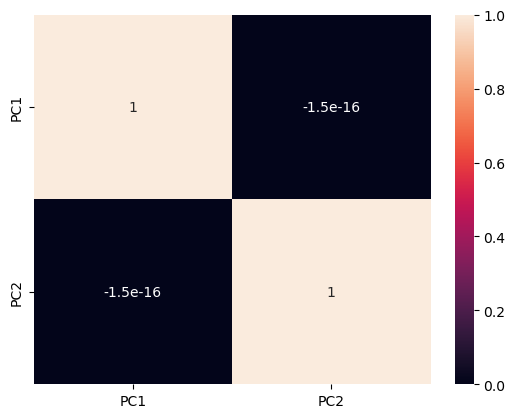

In [41]:
sns.heatmap(df_final.corr(),annot=True)

* Pricipal Components doesn't contain correlation and multicorrelation